In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from diagnostics.evaluation import fit_and_eval, weighted_quad_kappa
from imputers.hot_deck_full_imputer import HotDeckFullImputer, HotDeckColImputer
from imputers.hot_deck_simple_imputer import HotDeckSimpleImputer
from imputers.model_based import ModelBasedImputer
from imputers.model_based_imputer import ModelBasedFullImputer
from imputers.fill_missing_transformer import FillNaTransformer
from imputers.knn_filler import dist_fn1, KnnFiller
from imputers.regression_filler import RegressionFiller
from imputers.zero_filler import ZeroFiller
from tools.datasets import get_boston, get_heart, get_houses, get_prudential
from sklearn.metrics import make_scorer, accuracy_score, f1_score


In [3]:
# data, labels, continuous, discrete, dummy, categorical, target = get_boston()
# data, labels, continuous, discrete, dummy, categorical, target = get_heart()
# data, labels, continuous, discrete, dummy, categoric|al, target = get_houses()
data, labels, continuous, discrete, dummy, categorical, target = get_prudential()

train = data.drop(target, axis=1)

240.0    3418
0.0      1619
1.0       167
2.0       101
14.0       98
12.0       96
13.0       84
3.0        83
15.0       76
16.0       69
Name: Medical_History_15, dtype: int64
75.01291119344336 %


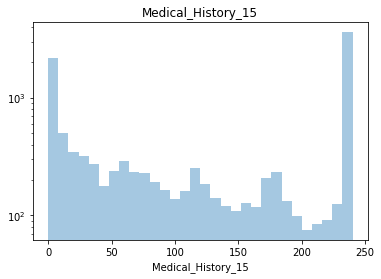

In [43]:
col = 'Medical_History_15'
sns_plot = sns.distplot(data[col].dropna(), bins=30, kde=False,)
sns_plot.set_title(col)
sns_plot.get_figure().get_axes()[0].set_yscale('log')
print(data[col].value_counts().nlargest(10))
print(data[col].isnull().sum() * 100 / data.shape[0], '%')
sns_plot.get_figure().savefig('./figures/basic_preprocessing/{}_hist.png'.format(col))